# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from geopy.distance import great_circle
import datetime as dt

In [3]:
df = pd.read_csv(r'D:\Class Assesments and In class -Imarticus\ML\Decision Tree + Random Forest + Ensemble Techniques\randomforest project\Random Forest_ Project\2 Project\Taxi Fare Prediction\Dataset\Dataset\TaxiFare.csv').sample(12000,random_state=20)

In [4]:
df.head(2)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
18991,54:00.0,6.1,2011-11-28 15:54:00 UTC,-73.875380,40.773810,-73.967785,40.760247,1
41632,06:07.0,17.5,2015-06-04 23:06:07 UTC,-74.006149,40.727226,-73.981560,40.784142,1


In [5]:
df.shape

(12000, 8)

In [6]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [7]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
df.isna().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [9]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,11.348416,-72.550196,39.978683,-72.524471,39.932146,1.668750
std,9.648357,10.245601,6.763680,10.330706,5.961991,1.295954
min,-2.500000,-74.689831,-73.987585,-74.689831,-73.978812,0.000000
25%,6.100000,-73.992204,40.734606,-73.991403,40.733790,1.000000
50%,8.500000,-73.981948,40.752580,-73.980445,40.753052,1.000000
75%,12.500000,-73.967712,40.766882,-73.963452,40.767983,2.000000
max,200.000000,40.783472,401.083332,40.782930,43.415190,6.000000


In [10]:
### Changing date's datatype and adding more features

df['date_time_of_pickup'] = df['date_time_of_pickup'].astype('datetime64[ns]')

In [11]:
df.dtypes

unique_id                       object
amount                         float64
date_time_of_pickup     datetime64[ns]
longitude_of_pickup            float64
latitude_of_pickup             float64
longitude_of_dropoff           float64
latitude_of_dropoff            float64
no_of_passenger                  int64
dtype: object

In [12]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
18991,54:00.0,6.1,2011-11-28 15:54:00,-73.875380,40.773810,-73.967785,40.760247,1
41632,06:07.0,17.5,2015-06-04 23:06:07,-74.006149,40.727226,-73.981560,40.784142,1
36306,27:00.0,21.0,2014-07-25 18:27:00,-73.974907,40.765105,-74.006922,40.740757,2
26881,50:32.0,5.5,2015-05-24 08:50:32,-73.968468,40.799229,-73.961601,40.811104,5
3469,30:38.0,13.3,2012-01-31 03:30:38,-73.939994,40.793948,-73.994143,40.755829,1


In [13]:
df['pickup_day'] = df['date_time_of_pickup'].dt.day_name()
df['pickup_month'] = df['date_time_of_pickup'].dt.month_name()
df['year'] = df['date_time_of_pickup'].dt.year
df['pickup_hour'] = df['date_time_of_pickup'].dt.hour
df['pickup_day_no'] = df['date_time_of_pickup'].dt.weekday
df['minute'] = df['date_time_of_pickup'].dt.minute

df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_month,year,pickup_hour,pickup_day_no,minute
18991,54:00.0,6.1,2011-11-28 15:54:00,-73.875380,40.773810,-73.967785,40.760247,1,Monday,November,2011,15,0,54
41632,06:07.0,17.5,2015-06-04 23:06:07,-74.006149,40.727226,-73.981560,40.784142,1,Thursday,June,2015,23,3,6
36306,27:00.0,21.0,2014-07-25 18:27:00,-73.974907,40.765105,-74.006922,40.740757,2,Friday,July,2014,18,4,27
26881,50:32.0,5.5,2015-05-24 08:50:32,-73.968468,40.799229,-73.961601,40.811104,5,Sunday,May,2015,8,6,50
3469,30:38.0,13.3,2012-01-31 03:30:38,-73.939994,40.793948,-73.994143,40.755829,1,Tuesday,January,2012,3,1,30


In [14]:
## Outlier removal

df.drop(df[df['longitude_of_pickup'] == 0].index, axis=0, inplace = True)
df.drop(df[df['latitude_of_pickup'] == 0].index, axis=0, inplace = True)
df.drop(df[df['longitude_of_dropoff'] == 0].index, axis=0, inplace = True)
df.drop(df[df['latitude_of_dropoff'] == 0].index, axis=0, inplace = True)
df.drop(df[df['no_of_passenger'] > 5].index, axis=0, inplace = True)
df.drop(df[df['no_of_passenger'] == 0].index, axis=0, inplace = True)

df.drop(df.index[(df.longitude_of_pickup < -75) | 
           (df.longitude_of_pickup > -72) | 
           (df.latitude_of_pickup < 40) | 
           (df.latitude_of_pickup > 42)],inplace=True)
df.drop(df.index[(df.longitude_of_dropoff < -75) | 
           (df.longitude_of_dropoff > -72) | 
           (df.latitude_of_dropoff < 40) | 
           (df.latitude_of_dropoff > 42)],inplace=True)

print(df.shape)

(11465, 14)


In [15]:
### Distance

def Distance(latitude_of_pickup,longitude_of_pickup,latitude_of_dropoff,longitude_of_dropoff):
    start_points = (latitude_of_pickup,longitude_of_pickup)
    end_points = (latitude_of_dropoff,longitude_of_dropoff)
    
    return great_circle(start_points,end_points).km

In [16]:
df['Distance'] = df.apply(lambda x: Distance(x['latitude_of_pickup'],x['longitude_of_pickup'],x['latitude_of_dropoff'],x['longitude_of_dropoff']), axis=1)

In [17]:
df.head(2)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_month,year,pickup_hour,pickup_day_no,minute,Distance
18991,54:00.0,6.1,2011-11-28 15:54:00,-73.875380,40.773810,-73.967785,40.760247,1,Monday,November,2011,15,0,54,7.926763
41632,06:07.0,17.5,2015-06-04 23:06:07,-74.006149,40.727226,-73.981560,40.784142,1,Thursday,June,2015,23,3,6,6.658997


In [18]:
## Removing data with Distance == 0 
df = df[~(df['Distance']==0)]
df.shape

(11342, 15)

In [19]:
df.pickup_hour.unique()

array([15, 23, 18,  8,  3,  9, 16, 20, 14, 22, 10, 17,  1,  0, 11, 13, 12,
       19, 21,  2,  4,  6,  7,  5], dtype=int64)

In [20]:
## pickup timeof day feature
def Duration(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late Night'

In [21]:
df['Pickup_timeofday'] = df['pickup_hour'].apply(Duration)
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_month,year,pickup_hour,pickup_day_no,minute,Distance,Pickup_timeofday
18991,54:00.0,6.1,2011-11-28 15:54:00,-73.875380,40.773810,-73.967785,40.760247,1,Monday,November,2011,15,0,54,7.926763,Afternoon
41632,06:07.0,17.5,2015-06-04 23:06:07,-74.006149,40.727226,-73.981560,40.784142,1,Thursday,June,2015,23,3,6,6.658997,Late Night
36306,27:00.0,21.0,2014-07-25 18:27:00,-73.974907,40.765105,-74.006922,40.740757,2,Friday,July,2014,18,4,27,3.821299,Evening
26881,50:32.0,5.5,2015-05-24 08:50:32,-73.968468,40.799229,-73.961601,40.811104,5,Sunday,May,2015,8,6,50,1.441394,Morning
3469,30:38.0,13.3,2012-01-31 03:30:38,-73.939994,40.793948,-73.994143,40.755829,1,Tuesday,January,2012,3,1,30,6.225487,Late Night


# EDA

In [22]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_month,year,pickup_hour,pickup_day_no,minute,Distance,Pickup_timeofday
18991,54:00.0,6.1,2011-11-28 15:54:00,-73.875380,40.773810,-73.967785,40.760247,1,Monday,November,2011,15,0,54,7.926763,Afternoon
41632,06:07.0,17.5,2015-06-04 23:06:07,-74.006149,40.727226,-73.981560,40.784142,1,Thursday,June,2015,23,3,6,6.658997,Late Night
36306,27:00.0,21.0,2014-07-25 18:27:00,-73.974907,40.765105,-74.006922,40.740757,2,Friday,July,2014,18,4,27,3.821299,Evening
26881,50:32.0,5.5,2015-05-24 08:50:32,-73.968468,40.799229,-73.961601,40.811104,5,Sunday,May,2015,8,6,50,1.441394,Morning
3469,30:38.0,13.3,2012-01-31 03:30:38,-73.939994,40.793948,-73.994143,40.755829,1,Tuesday,January,2012,3,1,30,6.225487,Late Night


In [23]:
## Univariate Analysis

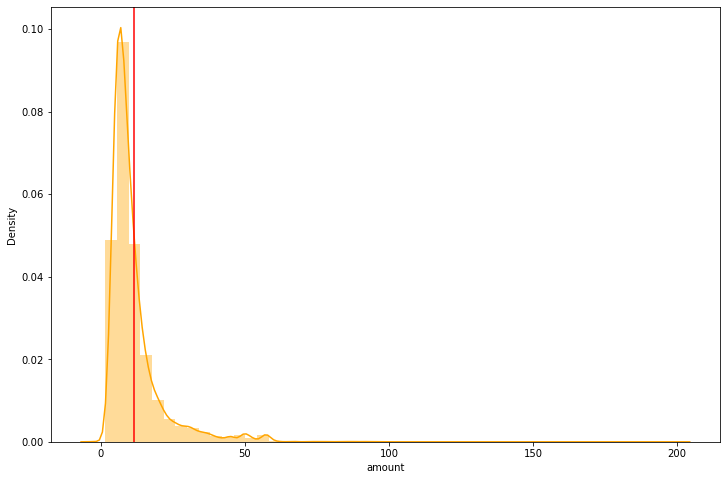

In [24]:
#1.Amount

plt.figure(figsize=(12,8))
sns.distplot(df['amount'],color='orange')
mean = df['amount'].mean()
plt.axvline(mean,0,1,color='red')

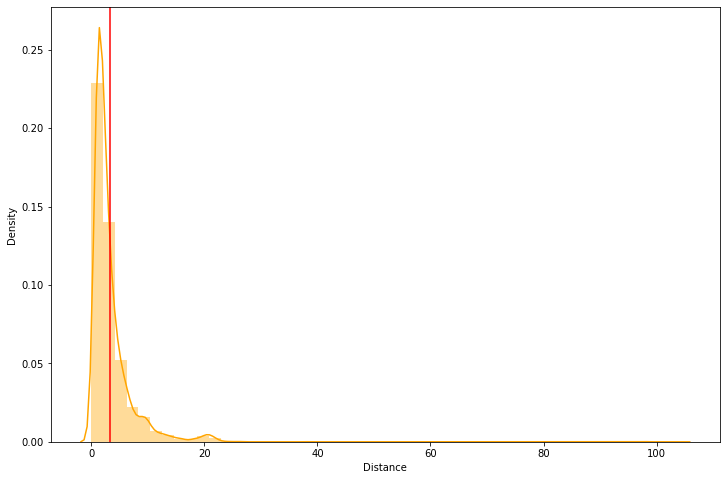

In [25]:
# 2.Distance

plt.figure(figsize=(12,8))
sns.distplot(df['Distance'],color='orange')
mean = df['Distance'].mean()
plt.axvline(mean,0,1,color='red')

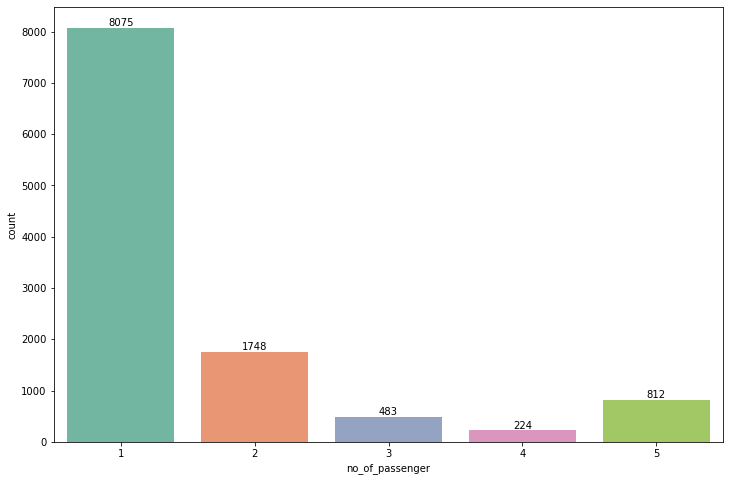

In [26]:
# 3. Pasenger Count
plt.figure(figsize=(12,8))
ax = sns.countplot(df['no_of_passenger'],palette ='Set2')
ax.bar_label(ax.containers[0]);

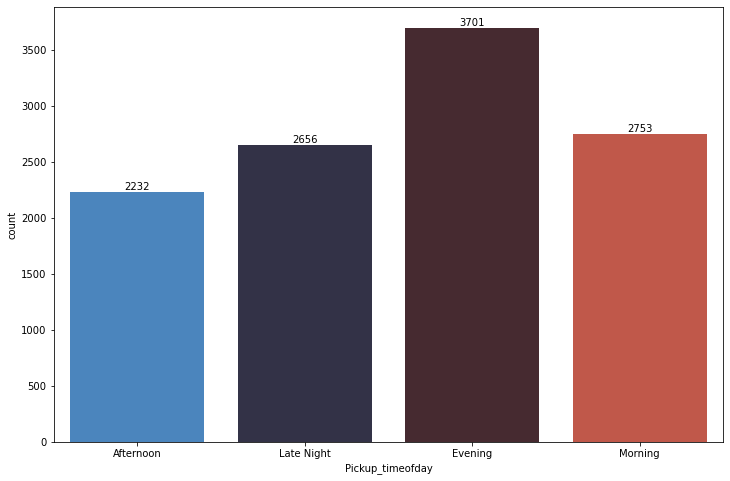

In [27]:
# 4.pickup_timeofday
plt.figure(figsize=(12,8))
ax = sns.countplot(df['Pickup_timeofday'],palette ='icefire')
ax.bar_label(ax.containers[0]);

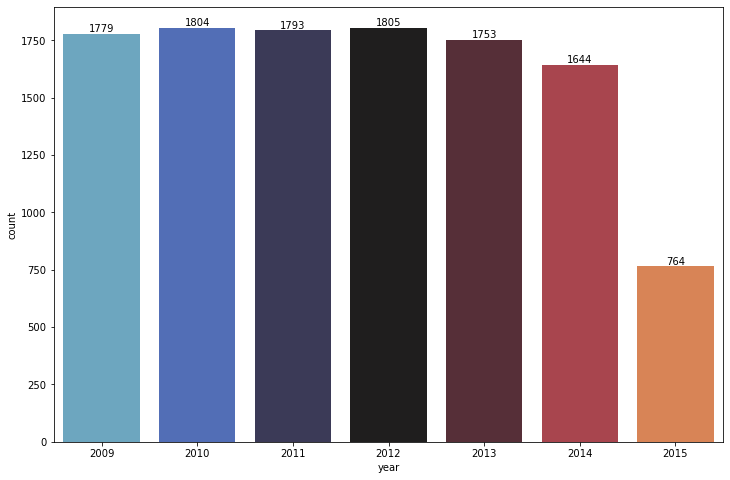

In [28]:
# 5.Year
plt.figure(figsize=(12,8))
ax = sns.countplot(df['year'],palette ='icefire')
ax.bar_label(ax.containers[0]);

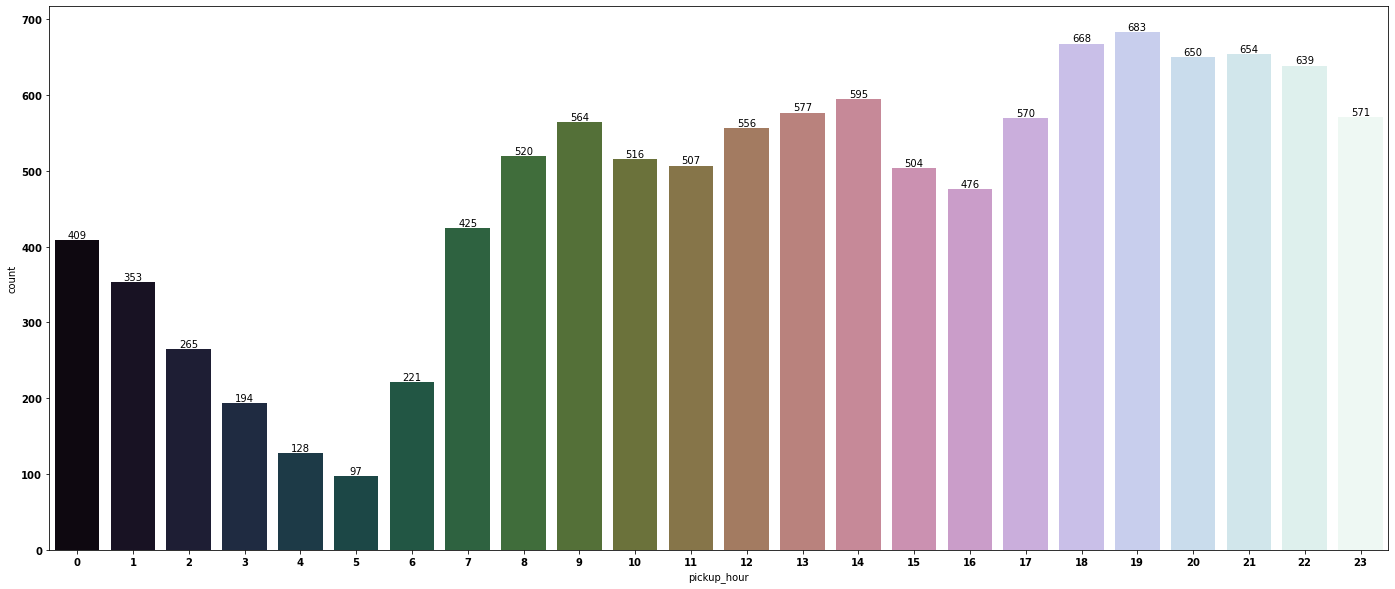

In [29]:
# 5.pickup_hour
plt.figure(figsize=(24,10))
ax = sns.countplot(df['pickup_hour'],palette ='cubehelix')
plt.xticks(fontsize=10,weight='bold')
plt.yticks(fontsize=10,weight='bold')
ax.bar_label(ax.containers[0]);

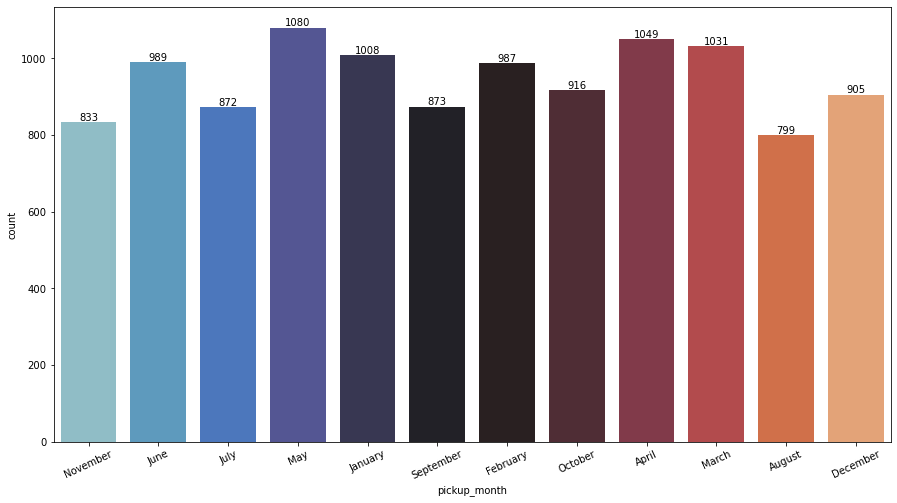

In [30]:
# 6.pickup_month
plt.figure(figsize=(15,8))
ax = sns.countplot(df['pickup_month'],palette ='icefire')
plt.xticks(rotation=25)
ax.bar_label(ax.containers[0]);

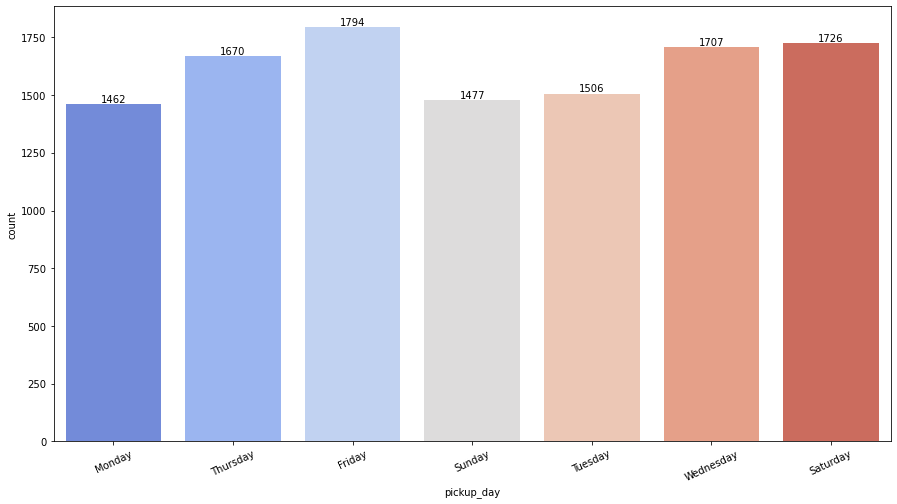

In [31]:
# 7.pickup_day
plt.figure(figsize=(15,8))
ax = sns.countplot(df['pickup_day'],palette ='coolwarm')
plt.xticks(rotation=25)
ax.bar_label(ax.containers[0]);

In [32]:
## MultiVariate Analysis

In [33]:
df.head(2)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_month,year,pickup_hour,pickup_day_no,minute,Distance,Pickup_timeofday
18991,54:00.0,6.1,2011-11-28 15:54:00,-73.875380,40.773810,-73.967785,40.760247,1,Monday,November,2011,15,0,54,7.926763,Afternoon
41632,06:07.0,17.5,2015-06-04 23:06:07,-74.006149,40.727226,-73.981560,40.784142,1,Thursday,June,2015,23,3,6,6.658997,Late Night


<AxesSubplot:xlabel='Distance', ylabel='amount'>

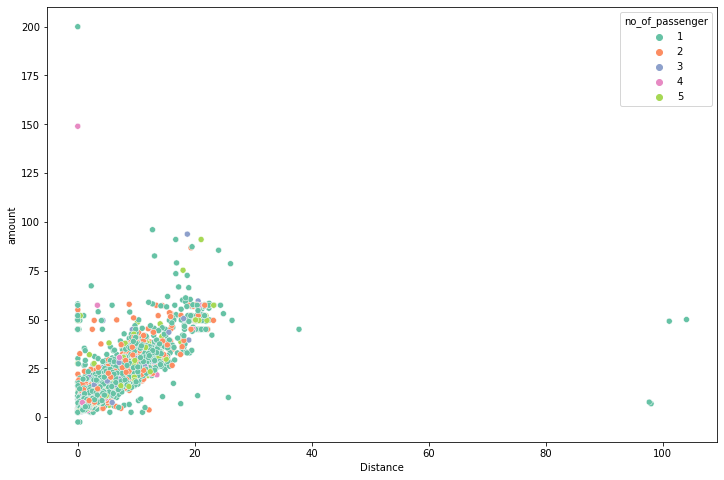

In [34]:
# 1. Price vs Distance

plt.figure(figsize=(12,8))
sns.scatterplot(x='Distance',y='amount',data=df,hue = 'no_of_passenger',markers='*',palette='Set2')


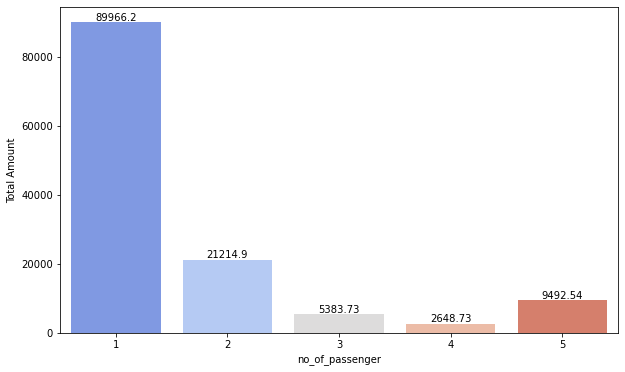

In [35]:
## 2. Amount Total vs number of passenger

Amount_total_bypassenger = df.groupby('no_of_passenger')['amount'].sum().reset_index(name='Total Amount')
plt.figure(figsize=(10,6))
ax = sns.barplot(Amount_total_bypassenger['no_of_passenger'],Amount_total_bypassenger['Total Amount'],palette ='coolwarm')
ax.bar_label(ax.containers[0]);

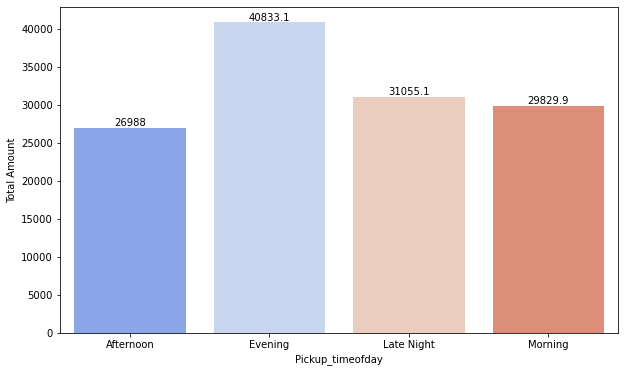

In [36]:
## 3. Amount Total vs pickup time

Amount_total_bypickuptime = df.groupby('Pickup_timeofday')['amount'].sum().reset_index(name='Total Amount')
plt.figure(figsize=(10,6))
ax = sns.barplot(Amount_total_bypickuptime['Pickup_timeofday'],Amount_total_bypickuptime['Total Amount'],palette ='coolwarm')
ax.bar_label(ax.containers[0]);

# Data Preprocessing

In [37]:
df.drop(['unique_id','date_time_of_pickup'],axis=1,inplace=True)

In [38]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_month,year,pickup_hour,pickup_day_no,minute,Distance,Pickup_timeofday
18991,6.1,-73.875380,40.773810,-73.967785,40.760247,1,Monday,November,2011,15,0,54,7.926763,Afternoon
41632,17.5,-74.006149,40.727226,-73.981560,40.784142,1,Thursday,June,2015,23,3,6,6.658997,Late Night
36306,21.0,-73.974907,40.765105,-74.006922,40.740757,2,Friday,July,2014,18,4,27,3.821299,Evening
26881,5.5,-73.968468,40.799229,-73.961601,40.811104,5,Sunday,May,2015,8,6,50,1.441394,Morning
3469,13.3,-73.939994,40.793948,-73.994143,40.755829,1,Tuesday,January,2012,3,1,30,6.225487,Late Night


In [39]:
df2 = df.copy()

In [40]:
df2['pickup_day'].unique()

array(['Monday', 'Thursday', 'Friday', 'Sunday', 'Tuesday', 'Wednesday',
       'Saturday'], dtype=object)

In [41]:
df2.drop(['pickup_day'],axis=1,inplace=True)

In [42]:
df2['pickup_day_no'].unique()

array([0, 3, 4, 6, 1, 2, 5], dtype=int64)

In [43]:
df2.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
pickup_month             object
year                      int64
pickup_hour               int64
pickup_day_no             int64
minute                    int64
Distance                float64
Pickup_timeofday         object
dtype: object

In [44]:
df2 = pd.get_dummies(df2,columns = ['pickup_month','Pickup_timeofday'])
df2.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,pickup_hour,pickup_day_no,minute,...,pickup_month_June,pickup_month_March,pickup_month_May,pickup_month_November,pickup_month_October,pickup_month_September,Pickup_timeofday_Afternoon,Pickup_timeofday_Evening,Pickup_timeofday_Late Night,Pickup_timeofday_Morning
18991,6.1,-73.875380,40.773810,-73.967785,40.760247,1,2011,15,0,54,...,0,0,0,1,0,0,1,0,0,0
41632,17.5,-74.006149,40.727226,-73.981560,40.784142,1,2015,23,3,6,...,1,0,0,0,0,0,0,0,1,0
36306,21.0,-73.974907,40.765105,-74.006922,40.740757,2,2014,18,4,27,...,0,0,0,0,0,0,0,1,0,0
26881,5.5,-73.968468,40.799229,-73.961601,40.811104,5,2015,8,6,50,...,0,0,1,0,0,0,0,0,0,1
3469,13.3,-73.939994,40.793948,-73.994143,40.755829,1,2012,3,1,30,...,0,0,0,0,0,0,0,0,1,0


In [45]:
X = df2.drop('amount',axis=1)
y = df2['amount']

# Model Building

In [46]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import optuna

from flaml import AutoML
from flaml.ml import sklearn_metric_loss_score

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=20)

In [49]:
X_train.head(2)

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,pickup_hour,pickup_day_no,minute,Distance,...,pickup_month_June,pickup_month_March,pickup_month_May,pickup_month_November,pickup_month_October,pickup_month_September,Pickup_timeofday_Afternoon,Pickup_timeofday_Evening,Pickup_timeofday_Late Night,Pickup_timeofday_Morning
28109,-74.005535,40.745772,-73.984122,40.757762,1,2013,14,0,21,2.242976,...,0,0,0,0,0,0,1,0,0,0
1212,-73.989740,40.733347,-73.987527,40.733556,1,2010,21,1,3,0.187907,...,0,1,0,0,0,0,0,1,0,0


In [33]:
X_train.dtypes

longitude_of_pickup            float64
latitude_of_pickup             float64
longitude_of_dropoff           float64
latitude_of_dropoff            float64
no_of_passenger                  int64
year                             int64
pickup_hour                      int64
pickup_day_no                    int64
minute                           int64
Distance                       float64
pickup_month_April               uint8
pickup_month_August              uint8
pickup_month_December            uint8
pickup_month_February            uint8
pickup_month_January             uint8
pickup_month_July                uint8
pickup_month_June                uint8
pickup_month_March               uint8
pickup_month_May                 uint8
pickup_month_November            uint8
pickup_month_October             uint8
pickup_month_September           uint8
Pickup_timeofday_Afternoon       uint8
Pickup_timeofday_Evening         uint8
Pickup_timeofday_Late Night      uint8
Pickup_timeofday_Morning 

In [50]:
import sklearn
from sklearn import metrics

In [35]:
model1 = XGBRegressor(random_state=10)
model1.fit(X_train,y_train)
testing_predictions = model1.predict(X_test)
training_predictions = model1.predict(X_train)
print('r2_score',r2_score(testing_predictions,y_test))
print('RMSE',np.sqrt(sklearn.metrics.mean_squared_error(testing_predictions,y_test)))
print('Score',model1.score(X_train,y_train))

r2_score 0.762636707533258
RMSE 4.333663688299345
Score 0.9510428285159471


In [38]:
model1_predictions = pd.DataFrame({'Predicted Price':testing_predictions,'Actual Price':y_test})
model1_predictions.tail(5)

,Predicted Price,Actual Price
16801,10.758490,8.9
33957,6.163814,4.5
35121,12.227164,11.7
33552,6.428948,8.1
5967,4.554190,4.9


## Let's see which Models are best for our data

Lazy Predict

In [47]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20 , random_state = 10)

reg = LazyRegressor(verbose=0,ignore_warnings=True)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [01:58<00:00,  2.89s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.82       0.82  3.70        0.58
HistGradientBoostingRegressor                0.82       0.82  3.70        3.17
RandomForestRegressor                        0.82       0.82  3.73       15.06
ExtraTreesRegressor                          0.82       0.82  3.74        6.47
XGBRegressor                                 0.82       0.82  3.75        2.33
GradientBoostingRegressor                    0.81       0.81  3.80        4.11
BaggingRegressor                             0.79       0.79  4.03        1.55
MLPRegressor                                 0.77       0.77  4.22       15.57
NuSVR                                        0.71       0.72  4.69       10.00
SVR                                          0.71       0.71  4.73       14.26
ExtraTreeRegressor                           0.66   

# Model Optimisation

### 1.HalvingGridSearchCV

In [56]:
model_params = {
     'xgboost':{
        'model':XGBRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1000,5)],
            'learning_rate':[0.05,0.1],
             'max_depth':[6, 8, 10, 12, 15],
             "gamma":[ 0.0, 0.1, 0.2],
        }
    },
    'lightgbm':{
        'model':LGBMRegressor(),
        'params':{
            'num_leaves':[int(x) for x in np.linspace(start = 30,stop = 200,num = 5)],
            'max_depth':[10,20,30],
            'learning_rate':[0.05,0.1,0.001],
            'n_estimators':[int(x) for x in np.linspace(start = 100,stop = 1000 ,num = 5)],
            'boosting_type':['gbdt','dart']
        }
    }
        
}

In [57]:
%%time
scores = []
for model_name,mp in model_params.items():
    clf = HalvingGridSearchCV(mp['model'],mp['params'],max_resources=40,random_state=100,n_jobs=-1,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best score':clf.best_score_,
        'best_params':clf.best_params_
    })

CPU times: total: 14min 12s
Wall time: 3min 11s


In [58]:
hcv_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
hcv_df

,model,best_score,best_params
0,xgboost,NaN,"{'gamma': 0.2, 'learning_rate': 0.1, 'max_dept..."
1,lightgbm,NaN,"{'boosting_type': 'gbdt', 'learning_rate': 0.0..."


In [60]:
model2 = clf.best_estimator_
model2

LGBMRegressor(learning_rate=0.05, max_depth=10, n_estimators=325, num_leaves=72)

In [61]:
predictions = model2.predict(X_test)
print('r2_score',r2_score(predictions,y_test))
print('RMSE',np.sqrt(sklearn.metrics.mean_squared_error(predictions,y_test)))
print('Score',model2.score(X_train,y_train))

r2_score 0.794415312706064
RMSE 3.9562872089535577
Score 0.926980662017192


# FLAML

In [43]:
from flaml import AutoML
from flaml.ml import sklearn_metric_loss_score

In [46]:
Auto_model = AutoML()
settings = {
  "time_budget": 400, # seconds
  "metric": 'r2',
  "task": 'regression',
  "verbose": 0,
  "n_jobs": -1,
  "eval_method": "cv",
  "n_splits": 5,
  "seed" : 100
  }

Auto_model.fit(X_train,y_train, **settings)

In [47]:
best_model_name = Auto_model.best_estimator
print('Best ML leaner:', best_model_name)
print('Best hyperparmeter:', Auto_model.model.estimator)

Best ML leaner: lgbm
Best hyperparmeter: LGBMRegressor(colsample_bytree=0.6496328996015014,
              learning_rate=0.10522982357318153, max_bin=511,
              min_child_samples=47, n_estimators=680, num_leaves=4,
              reg_alpha=0.004266403384675684, reg_lambda=0.03272345795749387,
              verbose=-1)


In [49]:
model3 = Auto_model.model.estimator
predictions = model3.predict(X_test)

In [54]:
print('r2_score',r2_score(predictions,y_test))
print('RMSE',np.sqrt(sklearn.metrics.mean_squared_error(predictions,y_test)))
print('Score',model3.score(X_train,y_train))

r2_score 0.7779025312136192
RMSE 4.068992736745956
Score 0.8569366304875614


In [55]:
print('r2', '=', 1 - sklearn_metric_loss_score('r2',predictions, y_test))

r2 = 0.8144816113538811
